In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

Categorical: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
Numerical: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [6]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [9]:
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
for col in df_encoded.columns:
    print(col)

age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week
income
workclass_Local-gov
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving


In [ ]:
scaler = StandardScaler()

numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

df_encoded[numerical_features] = scaler.fit_transform(
    df_encoded[numerical_features]
)

In [14]:
df_encoded.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-2.545397e-17,5.357903e-17,1.693789e-16,-1.476958e-17,2.647527e-17,2.165158e-16,6.410628e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.630231e+00,-1.668365e+00,-3.571870e+00,-1.467332e-01,-2.187803e-01,-3.326124e+00,-5.740308e-01
25%,-7.980149e-01,-6.848527e-01,-4.381216e-01,-1.467332e-01,-2.187803e-01,-7.812006e-02,-5.740308e-01
50%,-1.171110e-01,-1.080930e-01,-4.640300e-02,-1.467332e-01,-2.187803e-01,-7.812006e-02,-5.740308e-01
75%,6.394489e-01,4.561924e-01,1.128753e+00,-1.467332e-01,-2.187803e-01,3.382907e-01,-5.740308e-01
max,3.892656e+00,1.231247e+01,2.303909e+00,1.317519e+01,1.053806e+01,4.835527e+00,1.742067e+00


In [15]:
df[numerical_features].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [16]:
df_encoded[numerical_features].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-2.545397e-17,5.357903e-17,1.693789e-16,-1.476958e-17,2.647527e-17,2.165158e-16,6.410628e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.630231e+00,-1.668365e+00,-3.571870e+00,-1.467332e-01,-2.187803e-01,-3.326124e+00,-5.740308e-01
25%,-7.980149e-01,-6.848527e-01,-4.381216e-01,-1.467332e-01,-2.187803e-01,-7.812006e-02,-5.740308e-01
50%,-1.171110e-01,-1.080930e-01,-4.640300e-02,-1.467332e-01,-2.187803e-01,-7.812006e-02,-5.740308e-01
75%,6.394489e-01,4.561924e-01,1.128753e+00,-1.467332e-01,-2.187803e-01,3.382907e-01,-5.740308e-01
max,3.892656e+00,1.231247e+01,2.303909e+00,1.317519e+01,1.053806e+01,4.835527e+00,1.742067e+00


In [17]:
df_encoded.to_csv("processed_data.csv", index=False)

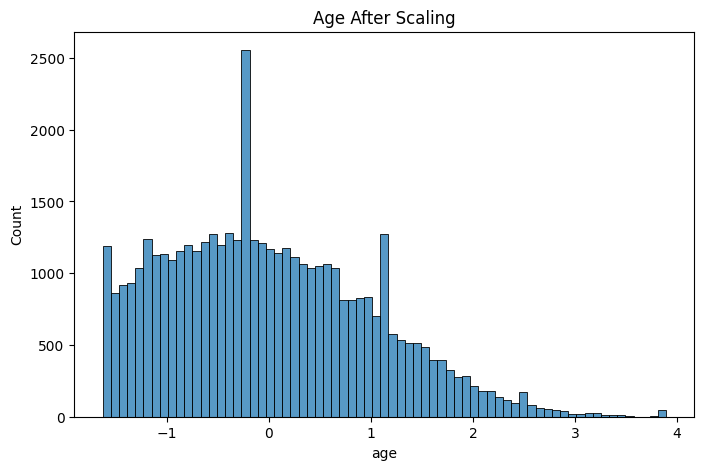

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df_encoded['age'])
plt.title("Age After Scaling")
plt.show()